<a href="https://colab.research.google.com/github/SianC7/LAIDS/blob/main/Final_AE_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#File Paths

In [2]:
# save_path = "/Users/siancaine/Library/Mobile Documents/com~apple~CloudDocs/Honours project"
# dataset_path =  "/Users/siancaine/Library/Mobile Documents/com~apple~CloudDocs/Honours project/Datasets"

save_path = "/content/drive/MyDrive/Colab Notebooks/Honours Project/Sian's Models/AE-MLP Model"
dataset_path =  "/content/drive/MyDrive/Colab Notebooks/Honours Project/Sian's Models/AE-MLP Model"

#Load in datasets premade datasets
(Normalised)

In [3]:
import pandas as pd
from collections import Counter
import os

# Training sets
ae_X_train = pd.read_csv(os.path.join(dataset_path, "ae_x_train.csv")).to_numpy()
ae_y_train = pd.read_csv(os.path.join(dataset_path, "ae_y_train.csv")).to_numpy().ravel()

# Validation sets
ae_X_val = pd.read_csv(os.path.join(dataset_path, "ae_x_val.csv")).to_numpy()
ae_y_val = pd.read_csv(os.path.join(dataset_path, "ae_y_val.csv")).to_numpy().ravel()

# # Classifier training sets
mlp_X_train = pd.read_csv(os.path.join(dataset_path, "adasyn_mlp_x_train.csv")).to_numpy() # MLP training data augumented using adasyn
mlp_y_train = pd.read_csv(os.path.join(dataset_path, "adasyn_mlp_y_train.csv")).to_numpy().ravel()

# Classifier validation sets
mlp_X_val = pd.read_csv(os.path.join(dataset_path, "mlp_x_val.csv")).to_numpy()
mlp_y_val = pd.read_csv(os.path.join(dataset_path, "mlp_y_val.csv")).to_numpy().ravel()

# Test sets
X_test = pd.read_csv(os.path.join(dataset_path, "ae_mlp_x_test.csv")).to_numpy()
y_test = pd.read_csv(os.path.join(dataset_path, "ae_mlp_y_test.csv")).to_numpy().ravel()

#Encoding map
attack_type_map = {'Normal Traffic': 0, 'Port Scanning': 1, 'Web Attacks': 2, 'Brute Force': 3, 'DDoS': 4, 'Bots': 5, 'DoS': 6} # Create a mapping from attack type to integer label


def print_class_distribution(y, name):
    counter = Counter(y)
    print(f"\n{name} class distribution:")
    for cls, cnt in counter.items():
        print(f"  Class {cls}: {cnt} samples")

print_class_distribution(ae_y_train, "AE_y_train")
print_class_distribution(ae_y_val, "AE_y_val")
print_class_distribution(mlp_y_train , "mlp_y_train")
print_class_distribution(mlp_y_val, "mlp_y_val")
print_class_distribution(y_test, "y_test")



AE_y_train class distribution:
  Class 0: 1357596 samples

AE_y_val class distribution:
  Class 0: 150844 samples

mlp_y_train class distribution:
  Class 5: 301702 samples
  Class 0: 301688 samples
  Class 6: 301889 samples
  Class 1: 301212 samples
  Class 3: 301697 samples
  Class 4: 301715 samples
  Class 2: 301702 samples

mlp_y_val class distribution:
  Class 0: 75423 samples
  Class 4: 20482 samples
  Class 1: 14511 samples
  Class 6: 30999 samples
  Class 3: 1464 samples
  Class 5: 312 samples
  Class 2: 343 samples

y_test class distribution:
  Class 0: 209506 samples
  Class 1: 18139 samples
  Class 6: 38749 samples
  Class 4: 25603 samples
  Class 3: 1830 samples
  Class 5: 389 samples
  Class 2: 429 samples


Visualise Split

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt


# # Get the counts for each attack type in each dataset
# ae_train_counts = np.bincount(y_train)
# ae_val_counts = np.bincount(y_val)
# classifier_train_counts = np.bincount(y_classifier_train)
# classifier_val_counts = np.bincount(y_classifier_val)
# test_counts = np.bincount(y_test)

# # Get the number of unique attack types (based on the maximum index found)
# num_attack_types = max(len(ae_train_counts), len(ae_val_counts), len(classifier_train_counts), len(classifier_val_counts), len(test_counts))

# # Pad counts with zeros if some attack types are missing in a dataset split
# ae_train_counts = np.pad(ae_train_counts, (0, num_attack_types - len(ae_train_counts)), 'constant')
# ae_val_counts = np.pad(ae_val_counts, (0, num_attack_types - len(ae_val_counts)), 'constant')
# classifier_train_counts = np.pad(classifier_train_counts, (0, num_attack_types - len(classifier_train_counts)), 'constant')
# classifier_val_counts = np.pad(classifier_val_counts, (0, num_attack_types - len(classifier_val_counts)), 'constant')
# test_counts = np.pad(test_counts, (0, num_attack_types - len(test_counts)), 'constant')


# # Data for plotting
# datasets = ['AE Train', 'AE Validation', 'MLP Train', 'MLP Validation', 'Test']
# all_counts = np.array([ae_train_counts, ae_val_counts, classifier_train_counts, classifier_val_counts, test_counts])


# # Get the original attack type names from the mapping
# reverse_attack_type_map = {v: k for k, v in attack_type_map.items()}# Reverse the mapping to get names from labels
# labels = [reverse_attack_type_map.get(i, f'Unknown {i}') for i in range(num_attack_types)]

# x = np.arange(len(labels))  # the label locations for attack types
# width = 0.15  # the width of the bars (adjusted for more datasets)

# fig, ax = plt.subplots(figsize=(14, 6)) # Figure size

# # Define your custom alternating light/dark colors
# colors = [
#     "#8fd7d7",  # Light Blue
#     "#00b0be",  # Med Blue
#     "#ff8ca1",  # Light Pink
#     "#f45f74",  # Med Pink
#     "#bdd373",  # Light Green
#     "#98c127",  # Med Green
#     "#ffcd8e",  # Light Orange
#     "#ffb255"   # Med Orange
# ]


# # Apply colors to your bars
# rects1 = ax.bar(x - width*2, all_counts[0], width, label='AE Training Set', color=colors[1])
# rects2 = ax.bar(x - width, all_counts[1], width, label='AE Val Set', color=colors[0])
# rects3 = ax.bar(x, all_counts[2], width, label='MLP Training Set', color=colors[3])
# rects4 = ax.bar(x + width, all_counts[3], width, label='MLP Val Set', color=colors[2])
# rects5 = ax.bar(x + width*2, all_counts[4], width, label='Test Set', color=colors[5])



# # Add labels and the tile
# ax.set_ylabel('Samples')
# ax.set_title('Class Distribution Across Datasets')
# ax.set_xticks(x)
# ax.set_xticklabels(labels, rotation=0, ha="center")
# ax.legend()

# # Add value labels to the bars
# def bar_label(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=6)

# bar_label(rects1)
# bar_label(rects2)
# bar_label(rects3)
# bar_label(rects4)
# bar_label(rects5)


# plt.tight_layout()
# plt.show()

#Baysian Optimisation Hyperparameter Tuning

In [5]:

# # Imports
# import keras_tuner as kt
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

# def build_autoencoder_model(hp):
#     autoencoder_input_dim = X_train.shape[1]
#     model = Sequential()
#     model.add(layers.Input(shape=(autoencoder_input_dim,)))

#     # Encoder layers
#     model.add(Dense(
#         units=hp.Int('dense_units_enc1', min_value=16, max_value=64, step=16),
#         activation='relu'
#     ))
#     model.add(BatchNormalization())
#     model.add(Dropout(hp.Choice('dropout1_rate', values=[0.0, 0.1, 0.2])))

#     model.add(Dense(
#         units=hp.Int('dense_units_enc2', min_value=8, max_value=32, step=8),
#         activation='relu'
#     ))
#     model.add(BatchNormalization())
#     model.add(Dropout(hp.Choice('dropout2_rate', values=[0.0, 0.1, 0.2])))

#     # Bottleneck layer
#     model.add(Dense(
#         units=hp.Int('dense_units_bottleneck', min_value=4, max_value=16, step=4),
#         activation='relu'
#     ))

#     # Decoder layers
#     model.add(Dense(
#         units=hp.Int('dense_units_dec1', min_value=8, max_value=32, step=8),
#         activation='relu'
#     ))
#     model.add(Dense(
#         units=hp.Int('dense_units_dec2', min_value=16, max_value=64, step=16),
#         activation='relu'
#     ))

#     # Output layer
#     model.add(Dense(autoencoder_input_dim, activation='sigmoid'))

#     # Compile
#     model.compile(optimizer='adam', loss='mse')
#     return model

# # --- Create tuner ---
# tuner = kt.BayesianOptimization(
#     build_autoencoder_model,
#     objective=kt.Objective('val_loss', direction='min'),
#     max_trials=15,
#     directory='bayesian_tuning_autoencoder',
#     project_name='autoencoder_tuning',
#     overwrite=True  # Ensures fresh tuning
# )

# # --- Early stopping ---
# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=3,
#     restore_best_weights=True
# )

# # --- Start tuning ---
# tuner.search(
#     X_train, X_train,
#     epochs=10,
#     batch_size=64,
#     validation_data=(X_val, X_val),
#     callbacks=[early_stop]
# )

# # --- Display Best Hyperparameters ---
# best_hps = tuner.get_best_hyperparameters(1)[0]
# print("\nBest Hyperparameters:")
# for param, value in best_hps.values.items():
#     print(f"{param}: {value}")

# # --- Visualize tuning results ---
# import matplotlib.pyplot as plt

# # Get ALL trials
# all_trials = tuner.oracle.trials.values()
# val_losses = [t.metrics.get_last_value('val_loss') for t in all_trials]

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(val_losses) + 1), val_losses, marker='o')
# plt.title('Validation Loss per Trial (Bayesian Optimization)')
# plt.xlabel('Trial Number')
# plt.ylabel('Validation Loss')
# plt.grid(True)
# plt.show()


#Autoencoder model
An autoencoder model consists of two parts:
- **Encoder**: Responsible for compressing the input data into a lower-dimensional representation of the input data that captures the most important information.
- **Decoder**: Responsible for reconstructing the input data from the latent space representation. The decoder takes the latent space representation as input and produces a reconstructed version of the input data as output. The reconstructed data should be as similar as possible to the original input data.

- Advantages of autoencoders: Can be used to detect anomalies, unsupervised learning models (they do not require labeled data in training), easy to train and implement.
- Disadvantages of autoencoders: computationally expensive to train (especially for large datasets.), they are sensitive to the choice of hyperparameters, difficult to interpret.

Below is a simple autoencoder model with three layers in the encoder and three layers in the decoder. https://levelup.gitconnected.com/build-deep-autoencoders-model-for-anomaly-detection-in-python-a-complete-guide-a7d0ec0e688
https://medium.com/@ndhilani.simbine/how-i-built-a-real-time-anomaly-detection-system-for-enterprise-networks-using-python-and-machine-0078d8a26e84
https://medium.com/@walid.daboubi/malware-detection-using-deep-autoencoder-neural-network-wannacry-as-a-test-9d0125c925b2

In [6]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np # Import numpy


# Determine the input dimension from the scaled training data
autoencoder_input_dim = ae_X_train.shape[1]
print(f"Autoencoder input dimension: {autoencoder_input_dim}")

autoencoder = Sequential([
    Input(shape=(autoencoder_input_dim,)),
    Dense(64, activation='relu'),   # Encoder layer
    Dense(32, activation='relu'),   # Encoder layer
    Dense(16, activation='relu'),   # Encoder layer
    Dense(8, activation='relu'),    # Encoder layer
    Dense(4, activation='relu'),    # Bottleneck layer
    Dense(8, activation='relu'),    # Decoder layer
    Dense(16, activation='relu'),   # Decoder layer
    Dense(32, activation='relu'),   # Decoder layer
    Dense(64, activation='relu'),   # Decoder layers
    Dense(autoencoder_input_dim, activation='sigmoid')  # Output layer sigmoid
])


autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())



Autoencoder input dimension: 52


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 52)             │         3,380 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,392 (48.41 KB)

 Trainable params: 12,392 (48.41 KB)

 Non-trainable params: 0 (0.00 B)

None


# Train Autoencoder

Epoch 1/20
21213/21213 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 0.0058 - val_loss: 8.1913e-04
Epoch 2/20
21213/21213 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 7.6128e-04 - val_loss: 6.6996e-04
Epoch 3/20
21213/21213 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - loss: 5.4256e-04 - val_loss: 2.8584e-04
Epoch 4/20
21213/21213 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - loss: 2.6753e-04 - val_loss: 4.4771e-04
Epoch 5/20
21213/21213 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 1.9756e-04 - val_loss: 1.9371e-04
Epoch 6/20
21213/21213 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 1.6993e-04 - val_loss: 1.4644e-04
Epoch 7/20
21213/21213 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 1.5298e-04 - val_loss: 1.3506e-04
Epoch 8/20
21213/21213 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 1.4198e-04 - val_loss: 1.1713e-04
Epoch 9/20
21213/21213 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 1.2138e-04 - val_loss: 1.1137e-04
Epoch 10/20
21213/21213 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 1.1430e-04 - val_loss: 1.0430e-04
Epoch 11/20
2

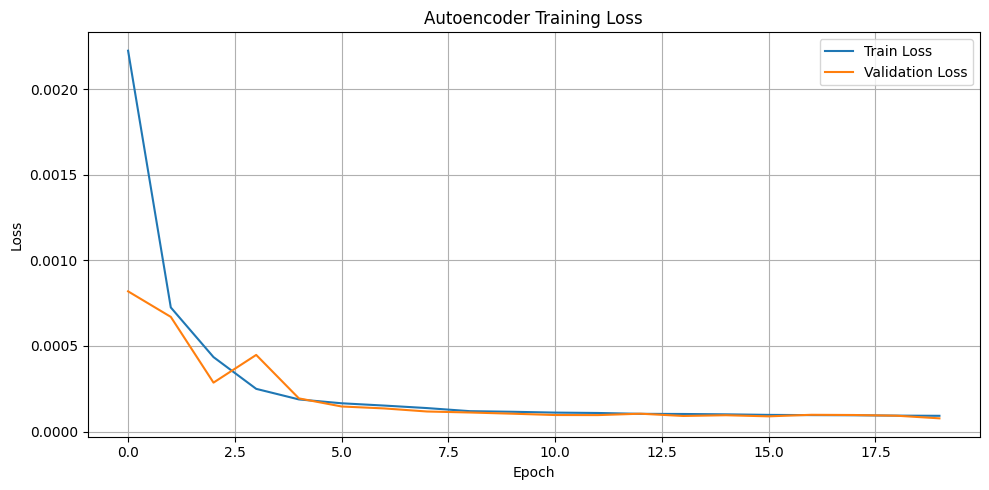

In [7]:
import matplotlib.pyplot as plt
import timeit
from tensorflow.keras.callbacks import EarlyStopping

# --- Early-stopping ---
early_stopping = EarlyStopping(monitor='val_loss', # Specify monitor='val_loss' to track the validation loss.
                               patience=4, #the number of epochs to wait for an improvement
                               restore_best_weights=True) # Revert the model to its state where it outputted the lowest validation loss

# Train the model with early stopping
start_time = timeit.default_timer()
history = autoencoder.fit(
    ae_X_train, ae_X_train,
    epochs=20,
    batch_size=64,
    validation_data=(ae_X_val, ae_X_val),
    callbacks=[early_stopping],
    verbose=1
)


# End timing
end_time = timeit.default_timer()
print(f"Training time: {end_time - start_time:.2f} seconds")

# Plot training and validation loss graph
plt.figure(figsize=(10, 5))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig("/Users/siancaine/Downloads/AE_Datasets/AE_training_val_history.png", dpi=300, bbox_inches="tight")# Save figure to file
plt.show()



# Establish Autoencoder's per Feature threshold
Using the validation data

Threshold per Feature

In [8]:
# --- Get reconstruction errors per feature (MAE) ---
val_reconstructions = autoencoder.predict(ae_X_val, verbose=0) #try reconstruct validation dataset
val_reconstruction_errors = np.abs(val_reconstructions - ae_X_val) # get the Mean Absolute Error (MAE) per feature, per sample

# Inspect first row
np.set_printoptions(precision=4, suppress=True, linewidth=1000)
print("original val data (first row):\n", ae_X_val[0])
print("\nval_reconstructions (first row):\n", val_reconstructions[0])
print("\nval_reconstruction_errors (first row):\n", val_reconstruction_errors[0])

# --- Mean per feature thresholds ---
mean_feature_errors = np.mean(val_reconstruction_errors, axis=0)  # mean reconstruction error per feature. axis = 0 because we're averaging over all samples for each feature.
std_feature_errors = np.std(val_reconstruction_errors, axis=0)    # std of reconstruction error per feature
print("\nval mean feature errors (first feature):\n", mean_feature_errors[0])
print("\nval std feature errors (first feature):\n", std_feature_errors[0])

# --- Calculate the threshold ---
# Threshold per feature = mean + 1*std
per_feature_thresholds = mean_feature_errors + std_feature_errors


original val data (first row):
 [0.0068 0.0021 0.0002 0.0001 0.0089 0.     0.0057 0.0081 0.1464 0.     0.3414 0.1226 0.0854 0.3334 0.     0.0001 0.0003 0.     0.0021 0.0001 0.0001 0.0003 0.     0.0017 0.     0.0001 0.0005 0.     0.9995 0.9946 0.     0.0001 0.     0.1152 0.2278 0.1543 0.0238 0.     1.     0.     0.1975 0.0001 0.125  0.0055 0.0002 1.     0.     0.     0.     0.     0.     0.    ]

val_reconstructions (first row):
 [0.0295 0.0058 0.     0.0001 0.0153 0.0001 0.02   0.0162 0.1171 0.     0.3445 0.1789 0.0839 0.337  0.0001 0.0014 0.0063 0.     0.0042 0.0002 0.0018 0.0045 0.     0.0026 0.     0.0001 0.0012 0.     0.9995 0.9942 0.     0.     0.0001 0.0971 0.2264 0.1674 0.0283 0.     1.     0.     0.2005 0.0003 0.1137 0.031  0.     1.     0.     0.     0.     0.0001 0.0001 0.    ]

val_reconstruction_errors (first row):
 [0.0227 0.0038 0.0001 0.     0.0064 0.0001 0.0143 0.0081 0.0293 0.     0.0031 0.0563 0.0014 0.0036 0.0001 0.0013 0.006  0.     0.0022 0.0002 0.0017 0.0042 0.   

# MLP Classifier Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2 # Import l2 regularizer

# Input dimensions
input_dim = mlp_X_train.shape[1]  # e.g., encoder output size
num_classes = len(np.unique(mlp_y_train))

# Define the model
classifier = Sequential([
        Input(shape=(input_dim,)),
        # Input layer with L2 regularization
        Dense(64,
              activation='relu',
              kernel_regularizer=l2(0.001)),

        # Hidden layer
        Dense(32,
              activation='relu',
              kernel_regularizer=l2(0.001)),

        Dropout(0.2),

        # Output layer
        Dense(num_classes,
              activation='softmax')
    ])

# Compile the model with custom learning rate
classifier.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(classifier.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │         3,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,703 (22.28 KB)

 Trainable params: 5,703 (22.28 KB)

 Non-trainable params: 0 (0.00 B)

None


# Train the MLP Classifer Model

Epoch 1/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 107s 3ms/step - accuracy: 0.7617 - loss: 0.7889 - val_accuracy: 0.8815 - val_loss: 0.4180
Epoch 2/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 96s 3ms/step - accuracy: 0.8635 - loss: 0.4923 - val_accuracy: 0.8907 - val_loss: 0.3768
Epoch 3/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 140s 3ms/step - accuracy: 0.8843 - loss: 0.4246 - val_accuracy: 0.9276 - val_loss: 0.3211
Epoch 4/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - accuracy: 0.9117 - loss: 0.3762 - val_accuracy: 0.9370 - val_loss: 0.3026
Epoch 5/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - accuracy: 0.9363 - loss: 0.3368 - val_accuracy: 0.9333 - val_loss: 0.3347
Epoch 6/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 144s 3ms/step - accuracy: 0.9475 - loss: 0.3087 - val_accuracy: 0.9290 - val_loss: 0.3510
Epoch 7/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 88s 3ms/step - accuracy: 0.9521 - loss: 0.2926 - val_accuracy: 0.9471 - val_loss: 0.2912
Epoch 8/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 146s 3ms/step - accura

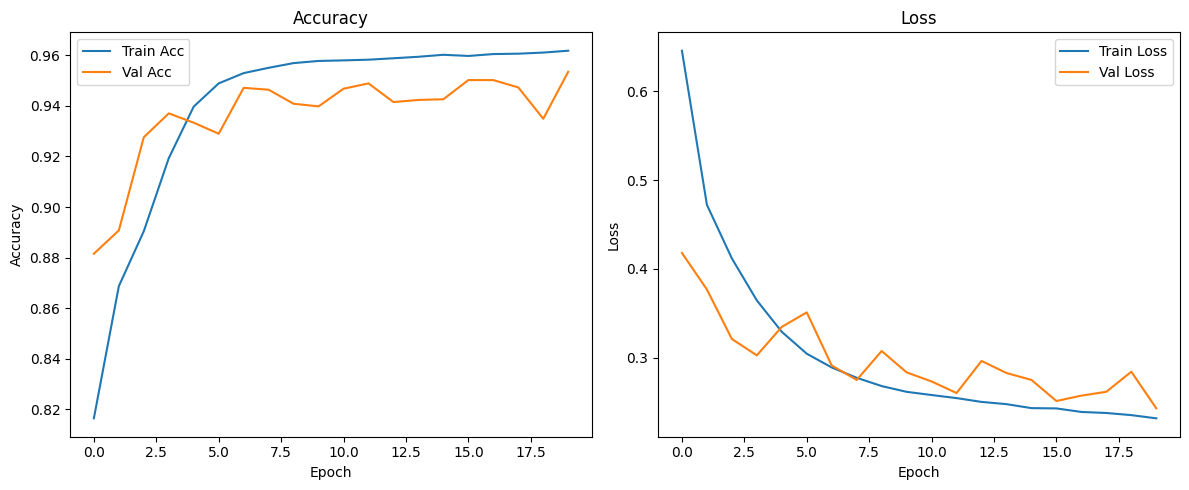

In [10]:
import matplotlib.pyplot as plt
import timeit
from tensorflow.keras.callbacks import EarlyStopping

# --- Early-stopping ---
early_stopping = EarlyStopping(monitor='val_loss', # Specify monitor='val_loss' to track the validation loss.
                               patience=4, #the number of epochs to wait for an improvement
                               restore_best_weights=True) # Revert the model to its state where it outputted the lowest validation loss

# Train the model with early stopping
start_time = timeit.default_timer()

# Train the model
history = classifier.fit(
    mlp_X_train, mlp_y_train,
    epochs=20,
    batch_size=64,
    validation_data=(mlp_X_val, mlp_y_val),
    verbose=1,
    callbacks=[early_stopping], # Add early stopping callback
)

end_time = timeit.default_timer()
print(f"Training time: {end_time - start_time:.2f} seconds")

# Plot accuracy and loss
plt.figure(figsize=(12,5)) # Create a new figure that is 12x5

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc') # Corrected key
plt.plot(history.history['val_accuracy'], label='Val Acc') # Corrected key
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
#plt.savefig("/Users/siancaine/Downloads/AE_Datasets/MLP_training_val_history.png", dpi=300, bbox_inches="tight")# Save figure to file
plt.show()

# Test the models on the test dataset

In [11]:
import tensorflow as tf
import numpy as np

# Run autoencoder on the entire test set at once
test_reconstructions = autoencoder.predict(X_test, verbose=1)

# Compute reconstruction errors for all samples
test_reconstruction_errors = np.abs(test_reconstructions - X_test)

# Flag anomalies (ANY feature above its threshold per sample) and broadcast thresholds across all samples
AE_y_pred = (test_reconstruction_errors > per_feature_thresholds).any(axis=1).astype(int)

# Collect indices of the samples the autoencoder has deemed as malicious
malicious_pred_indices = np.flatnonzero(AE_y_pred)# Find the indices of all non-zero elements in AE_y_pred (samples predicted as Malicious)


print(AE_y_pred[:10])
print(f"malware predictions: {np.sum(AE_y_pred == 1)}")
print(malicious_pred_indices[:10])

# Run classifier only on anomalous samples (if any)
mlp_y_pred_probs, mlp_y_preds, mlp_y_test, mlp_x_test = [], [], [], []

if len(malicious_pred_indices) > 0:
    mlp_y_test = y_test[malicious_pred_indices]
    mlp_x_test = X_test[malicious_pred_indices]

    print(f"Benign samples classified as malware: {np.sum(mlp_y_test == 0)}")
    print(f"Malware classified as malware: {np.count_nonzero(mlp_y_test)}")

    mlp_y_pred_probs = classifier.predict(mlp_x_test, verbose=1)
    mlp_y_preds = np.argmax(mlp_y_pred_probs, axis=1)

# Display first row of data
np.set_printoptions(precision=4, suppress=True, linewidth=1000)

print("First sample in X_test:")
print(f"\nOriginal sample values:\n {X_test[0]}\nwhich is: {y_test[0]}")
print("\nReconstructed sample values:\n", test_reconstructions[0])
print("\nReconstruction errors:\n", test_reconstruction_errors[0])
print("\nAE_y_pred: ", AE_y_pred[0])



9208/9208 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
[0 1 0 0 1 0 1 1 0 0]
malware predictions: 165133
[ 1  4  6  7 11 13 14 15 16 18]
Benign samples classified as malware: 86612
Malware classified as malware: 78521
5161/5161 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
First sample in X_test:

Original sample values:
 [0.9377 0.     0.     0.     0.0002 0.0026 0.0013 0.     0.0003 0.0028 0.0016 0.     0.0853 0.3388 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.9995 0.9946 0.0055 0.0082 0.0041 0.0002 0.0018 0.     0.     0.     0.     1.     0.0023 0.     0.0078 0.0039 0.     1.     0.     0.     0.     0.     0.     0.    ]
which is: 0

Reconstructed sample values:
 [0.928  0.     0.     0.     0.0005 0.0001 0.0012 0.0015 0.     0.0002 0.     0.     0.0851 0.3416 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.9996 0.9948 0.0105 0.0078 0.     0.0008 0.0019 0.0017 0.0001 0.     0.     1.     0.0021 0. 

# Evaluate AE Predictions Against Ground Truths

Benign samples: 209506
Malware samples: 85139


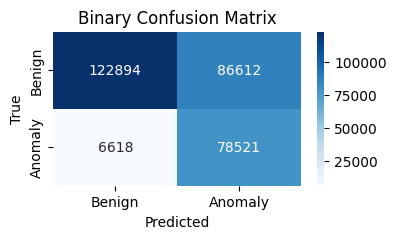


Accuracy:
sklearn Accuracy: 0.6835853315006194

Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.59      0.72    209506
     Anomaly       0.48      0.92      0.63     85139

    accuracy                           0.68    294645
   macro avg       0.71      0.75      0.68    294645
weighted avg       0.81      0.68      0.70    294645


Anomaly Detection Metrics:
True Positives (Anomalies correctly detected): 78521
True Negatives (Normal Traffic correctly identified): 122894
False Positives (Normal Traffic misclassified as Anomaly): 86612
False Negatives (Anomalies missed): 6618

Percentage of Anomalies Detected: 78521 (92.23)%
Percentage of Normal Traffic Misclassified (False Positive Rate): 86612 (41.34%)

Total number of samples classified as malicious: 165133 (41.34%)


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns # Import seaborn for heatmap plotting
import numpy as np
import matplotlib.pyplot as plt

# Convert y_test to binary: 0 = Normal, 1 = Anomaly
y_test_binary = (y_test != 0).astype(int)
print(f"Benign samples: {np.sum(y_test_binary == 0)}")
print(f"Malware samples: {np.count_nonzero(y_test_binary)}")


# --- Confusion matrix ---
cm = confusion_matrix(y_test_binary, AE_y_pred)

# --- Heatmap ---
# Labels for the binary confusion matrix
binary_labels = ['Benign', 'Anomaly']

# Plot heatmap
plt.figure(figsize=(4, 2)) # Adjust figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=binary_labels, yticklabels=binary_labels)
plt.title("Binary Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
#plt.savefig("/Users/siancaine/Downloads/AE_Datasets/AE_confusion_matrix.png", dpi=300, bbox_inches="tight")# Save figure to file
plt.show()


# Accuracy scores
print("\nAccuracy:")
print("sklearn Accuracy:", accuracy_score(y_test_binary, AE_y_pred))

# Classification report (accuracy, precision, recall, F1)
print("\nClassification Report:")
# target_names should be the actual class names for binary classification
print(classification_report(y_test_binary, AE_y_pred, target_names=binary_labels))

# --- Custom Metrics for Anomaly Detection ---
# From the confusion matrix:
ae_tn, ae_fp, ae_fn, ae_tp = cm.ravel() # Unpack confusion matrix values

print("\nAnomaly Detection Metrics:")
print(f"True Positives (Anomalies correctly detected): {ae_tp}")
print(f"True Negatives (Normal Traffic correctly identified): {ae_tn}")
print(f"False Positives (Normal Traffic misclassified as Anomaly): {ae_fp}")
print(f"False Negatives (Anomalies missed): {ae_fn}")

# Calculate percentages
total_anomalies = ae_tp + ae_fn
total_normal = ae_tn + ae_fp

percentage_anomalies_detected = (ae_tp / total_anomalies) * 100 if total_anomalies > 0 else 0
percentage_normal_misclassified = (ae_fp / total_normal) * 100 if total_normal > 0 else 0

print(f"\nPercentage of Anomalies Detected: {ae_tp} ({percentage_anomalies_detected:.2f})%")
print(f"Percentage of Normal Traffic Misclassified (False Positive Rate): {ae_fp} ({percentage_normal_misclassified:.2f}%)")
print(f"\nTotal number of samples classified as malicious: {ae_tp+ae_fp} ({percentage_normal_misclassified:.2f}%)")


# Evaluate MLP Classifier Predictions

AE anomalies flagged (should equal classifier input size): 165133
Samples seen by classifier: 165133
Sum of confusion matrix entries: 165133

Confusion Matrix:


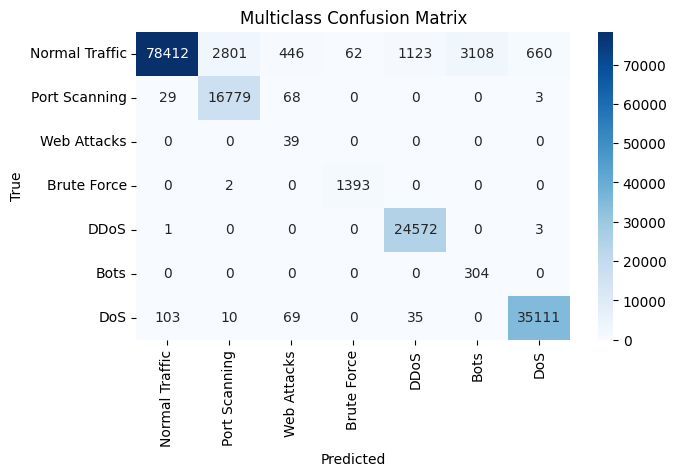


Accuracy:
sklearn Accuracy: 0.9483870577050014

Classification Report:
                precision    recall  f1-score   support

Normal Traffic       1.00      0.91      0.95     86612
 Port Scanning       0.86      0.99      0.92     16879
   Web Attacks       0.06      1.00      0.12        39
   Brute Force       0.96      1.00      0.98      1395
          DDoS       0.95      1.00      0.98     24576
          Bots       0.09      1.00      0.16       304
           DoS       0.98      0.99      0.99     35328

      accuracy                           0.95    165133
     macro avg       0.70      0.98      0.73    165133
  weighted avg       0.97      0.95      0.96    165133

Total Mal: 78521 & 78521
Total Malware Samples: 78521
Total Benign Samples: 86612

TP, TN, FP, FN for Malware vs Benign:
True Positives (Malware predicted as ANY malware): 78388 (99.83% of Malware Identified)
True Negatives (Benign predicted as Benign): 78412 (90.53% of Benign Identified)
False Positives (Be

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns # Import seaborn for heatmap plotting
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import matplotlib for plotting


# --- Confusion matrix ---
# For multiclass, confusion_matrix directly handles the true and predicted labels
cm = confusion_matrix(mlp_y_test, mlp_y_preds)

# Sanity Test
print("AE anomalies flagged (should equal classifier input size):", len(malicious_pred_indices))
print("Samples seen by classifier:", len(mlp_y_test))
print("Sum of confusion matrix entries:", np.sum(cm))

print("\nConfusion Matrix:")

# --- Heatmap ---
# Get the original attack type names from the mapping
reverse_attack_type_map = {v: k for k, v in attack_type_map.items()}
labels = [reverse_attack_type_map.get(i, f'Unknown {i}') for i in range(cm.shape[0])] # Use matrix shape for label count

# Plot heatmap
plt.figure(figsize=(7, 4)) # Adjust figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Multiclass Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
#plt.savefig("/Users/siancaine/Downloads/AE_Datasets/MLP_confusion_matrix.png", dpi=300, bbox_inches="tight")# Save figure to file
plt.show()


# Accuracy scores
print("\nAccuracy:")
print("sklearn Accuracy:", accuracy_score(mlp_y_test, mlp_y_preds))

# Classification report (accuracy, precision, recall, F1)
print("\nClassification Report:")
# target_names should be the actual class names
print(classification_report(mlp_y_test, mlp_y_preds, target_names=labels))

# Calculate malware vs benign sample metrics
normal_traffic = attack_type_map.get('Normal Traffic', None)


if normal_traffic is not None:

    total_benign = np.sum(cm[normal_traffic, :])
    benign_identified_correctly = cm[normal_traffic, normal_traffic] #TN
    benign_misclassified =  total_benign - benign_identified_correctly #FP

    mlp_tn = benign_identified_correctly
    mlp_fp = benign_misclassified

    total_malware = len(mlp_x_test) - total_benign
    print(f"Total Mal: {len(mlp_x_test) - total_benign} & {np.sum(cm) - np.sum(cm[normal_traffic, :])}")

    # Count all malware samples correctly identified (diagonal elements excluding normal traffic)
    malware_identified_correctly = np.sum(np.diag(cm)) - cm[normal_traffic, normal_traffic]

    # Count all the malware samples identified even if misclassified as the wrong type of malware
    total_malware_identified = 0
    for i in range(len(labels)):
        if i != normal_traffic:  # skip the normal traffic row in the cm
            # for a row/class in the cm, count the samples from malware class that were predicted as ANY malware type (not benign)
            malware_predicted_as_any_malware = np.sum(cm[i, :]) - cm[i, 0] # Count all the samples in the row, minus the column of samples predicted as normal traffic
            total_malware_identified += malware_predicted_as_any_malware

    malware_misclassified = total_malware - total_malware_identified

    mlp_fn = malware_misclassified
    mlp_tp = total_malware_identified

    print(f"Total Malware Samples: {total_malware}")
    print(f"Total Benign Samples: {total_benign}")

    # --- Calculate and print TP, TN, FP, FN for Malware vs Benign ---
        # TP: Malware identified as ANY malware type (total_malware_identified_as_malware)
        # TN: Benign correctly predicted as Benign (cm[normal_traffic_label, normal_traffic_label])
        # FP: Benign incorrectly predicted as Malware (benign_misclassified_as_malware_count)
        # FN: Malware incorrectly predicted as Benign (Total Malware Samples - Malware Identified as Any Malware)

    print("\nTP, TN, FP, FN for Malware vs Benign:")

    print(f"True Positives (Malware predicted as ANY malware): {mlp_tp} ({(total_malware_identified/total_malware)*100:.2f}% of Malware Identified)")
    print(f"True Negatives (Benign predicted as Benign): {mlp_tn} ({(benign_identified_correctly/total_benign)*100:.2f}% of Benign Identified)")
    print(f"False Positives (Benign predicted as Malware): {mlp_fp} ({(benign_misclassified/total_benign)*100:.2f}% of Benign Misclassified)")
    print(f"False Negatives (Malware predicted as Benign): {mlp_fn} ({(malware_misclassified/total_malware)*100:.2f}% of Malware Misclassified)")

    print("\nPercentage of each Malware Class Correctly Identified:")
    for i, label in enumerate(labels):
        if i != normal_traffic: # Exclude 'Normal Traffic'
            correctly_identified = cm[i, i]
            total_in_class = np.sum(cm[i, :])
            percentage_identified = (correctly_identified / total_in_class) * 100 if total_in_class > 0 else 0
            print(f"{label}: {percentage_identified:.2f}%")

    # ---- Performance Metrics ---
    # Accuracy
    accuracy = (mlp_tp + mlp_tn) / (mlp_tp + mlp_tn + mlp_fp + mlp_fn) if (mlp_tp + mlp_tn + mlp_fp + mlp_fn) > 0 else 0
    # Precision (for malware class)
    precision = mlp_tp / (mlp_tp + mlp_fp) if (mlp_tp + mlp_fp) > 0 else 0
    # Recall / Sensitivity (for malware class)
    recall = mlp_tp / (mlp_tp + mlp_fn) if (mlp_tp + mlp_fn) > 0 else 0
    # F1-Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    # False Positive Rate (FPR)
    fpr = (mlp_fp / (mlp_fp + mlp_tn)) * 100 if (mlp_fp + mlp_tn) > 0 else 0
    # False Negative Rate (FNR)
    fnr = (mlp_fn / (mlp_fn + mlp_tp)) * 100 if (mlp_fn + mlp_tp) > 0 else 0

    print("\n--- Malware vs Benign Performance Metrics ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Malware): {precision:.4f}")
    print(f"Recall / Sensitivity (Malware): {recall:.4f}")
    print(f"F1-Score (Malware): {f1_score:.4f}")
    print(f"False Positive Rate (Benign misclassified): {fpr:.2f}%")
    print(f"False Negative Rate (Malware missed): {fnr:.2f}%")

#Total metrics

In [14]:


# --- Totals ---
Total_benign_samples = len(y_test[y_test == 0])
Total_malware_samples = len(y_test[y_test != 0])

# --- Confusion matrix values ---
Total_malware_detected = mlp_tp  # True Positives
Total_malware_missed   = ae_fn + mlp_fn  # False Negatives
Total_benign_detected  = ae_tn + mlp_tn  # True Negatives
Total_benign_missed    = mlp_fp  # False Positives

# --- Percentages ---
perc_tp = (Total_malware_detected / Total_malware_samples) * 100 if Total_malware_samples > 0 else 0
perc_fn = (Total_malware_missed / Total_malware_samples) * 100 if Total_malware_samples > 0 else 0
perc_tn = (Total_benign_detected / Total_benign_samples) * 100 if Total_benign_samples > 0 else 0
perc_fp = (Total_benign_missed / Total_benign_samples) * 100 if Total_benign_samples > 0 else 0

# --- Print confusion matrix ---
print("\nConfusion Matrix:\n")
print(f"                Predicted Benign      Predicted Malware")
print(f"Actual Benign   TN = {Total_benign_detected} ({perc_tn:.2f}%)  FP = {Total_benign_missed} ({perc_fp:.2f}%)")
print(f"Actual Malware  FN = {Total_malware_missed} ({perc_fn:.2f}%)   TP = {Total_malware_detected} ({perc_tp:.2f}%)")



Confusion Matrix:

                Predicted Benign      Predicted Malware
Actual Benign   TN = 201306 (96.09%)  FP = 8200 (3.91%)
Actual Malware  FN = 6751 (7.93%)   TP = 78388 (92.07%)


# Visualisations

Plot Autoencoder's Reconstructions Errors for each Feature

In [15]:
# import matplotlib.pyplot as plt
# import numpy as np
# import tensorflow as tf

# # Graphical representation of training set loss:
# val_loss = tf.keras.losses.mae(val_reconstructions, X_val) # Mean absolute error

# # Graphical representation of test set loss:
# test_loss = tf.keras.losses.mae(test_reconstructions, X_test) # Mean absolute error

# # Convert y_test to numpy array for indexing
# y_test_np = y_test

# # Separate test loss for benign and malicious samples
# benign_test_loss = test_loss[y_test_np == 0]
# malicious_test_loss = test_loss[y_test_np != 0]

# # Get the feature names
# feature_names = X_benign.columns.tolist() # Assuming X_benign still has original column names

# # Plotting the first 5 features
# num_features_to_plot = 10

# for i in range(num_features_to_plot):
#     plt.figure(figsize=(10, 4))

#     # Plot validation reconstruction error distribution
#     plt.subplot(1, 2, 1)
#     plt.hist(np.abs(val_reconstructions[:, i] - X_val[:, i]), bins=50, label='Normal', color='blue', alpha=0.5)
#     plt.axvline(pre_feature_thresholds[i], color='r', linewidth=1, linestyle='dashed', label=f'Threshold: {pre_feature_thresholds[i]:.3f}')
#     plt.title(f'Distribution of Val Reconstruction Errors\n({feature_names[i]})')
#     plt.xlabel('Reconstruction Error')
#     plt.ylabel('Frequency')
#     plt.legend()
#     plt.grid(True)

#     # Plot test reconstruction errors for benign and malicious samples
#     plt.subplot(1, 2, 2)
#     plt.hist(np.abs(test_reconstructions[y_test_np == 0, i] - X_test[y_test_np == 0, i]), bins=50, label='Benign Test Loss', color='blue', alpha=0.5)
#     plt.hist(np.abs(test_reconstructions[y_test_np != 0, i] - X_test[y_test_np != 0, i]), bins=50, label='Malicious Test Loss', color='orange', alpha=0.5)
#     plt.axvline(pre_feature_thresholds[i], color='r', linewidth=1, linestyle='dashed', label=f'Threshold: {pre_feature_thresholds[i]:.3f}')
#     plt.title(f'Distribution of Test Reconstruction Errors\n({feature_names[i]})')
#     plt.xlabel('Reconstruction Error')
#     plt.ylabel('Frequency')
#     plt.legend()
#     plt.grid(True)

#     plt.tight_layout() # Adjust layout to prevent overlap
#     plt.show()

# Plot Autoencoder's Input Vs. Reconstructions for anomaly and normal samples

Benign samples

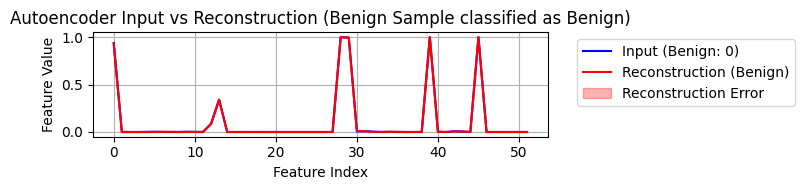

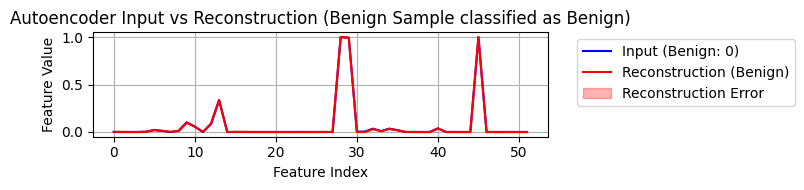

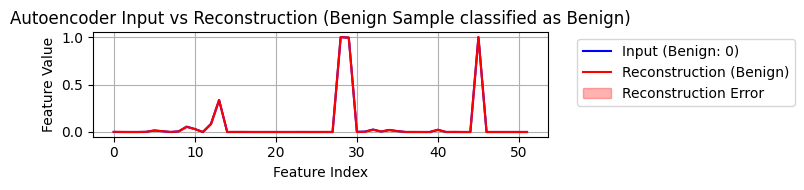

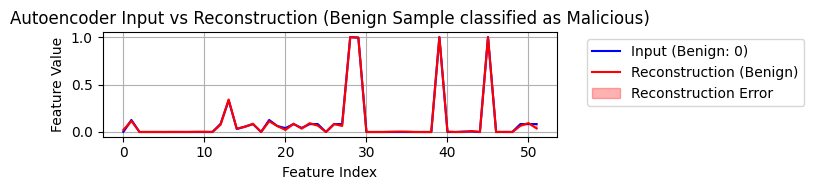

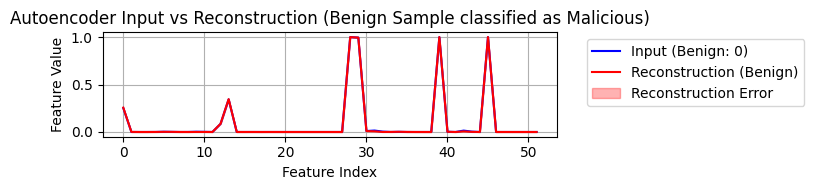

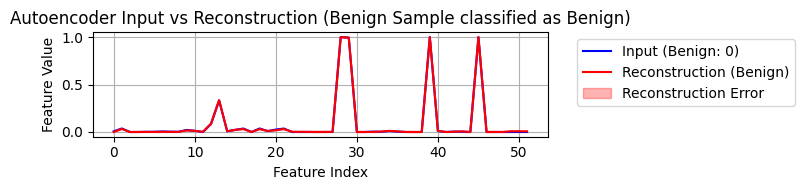

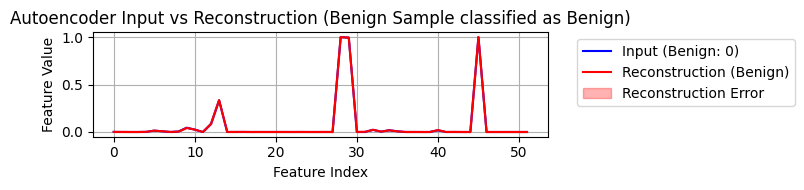

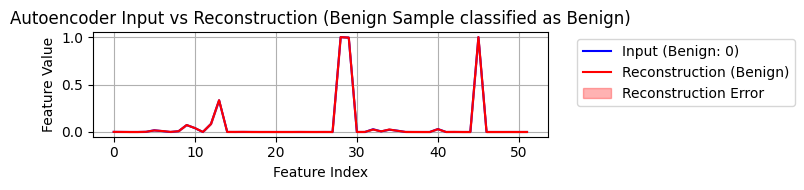

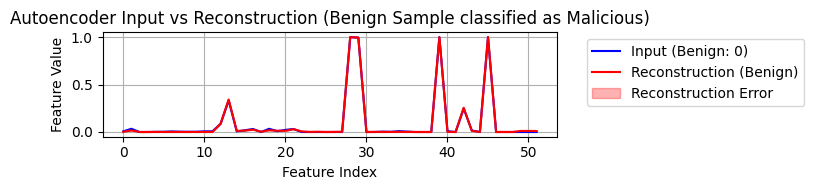

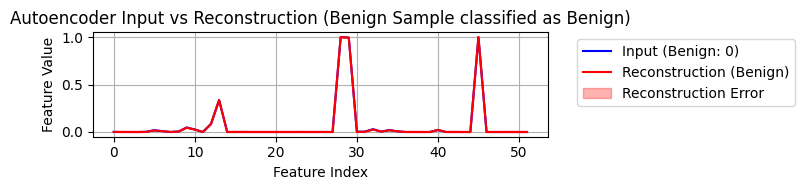

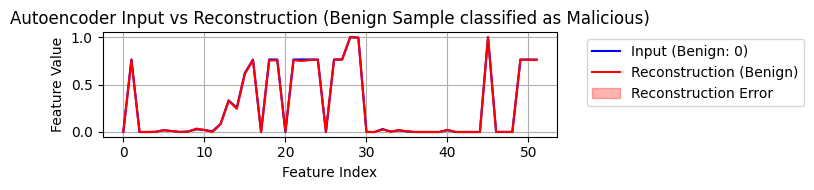

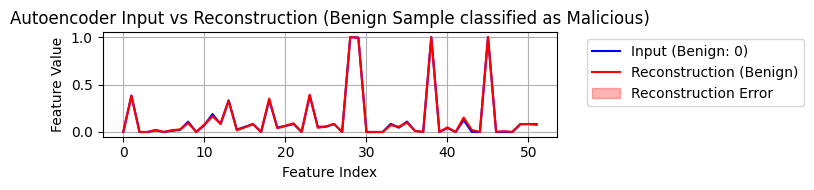

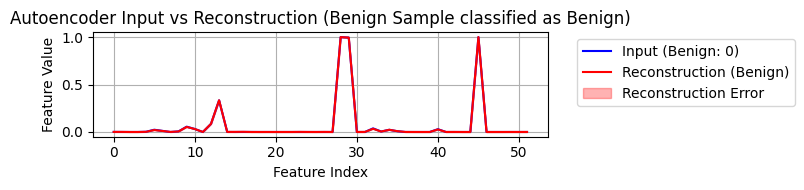

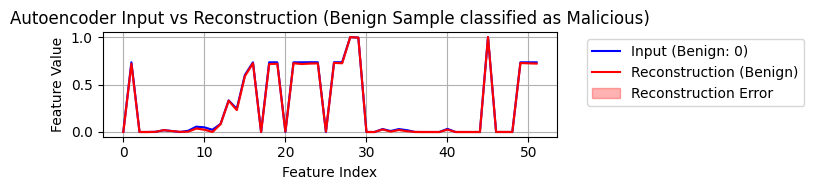

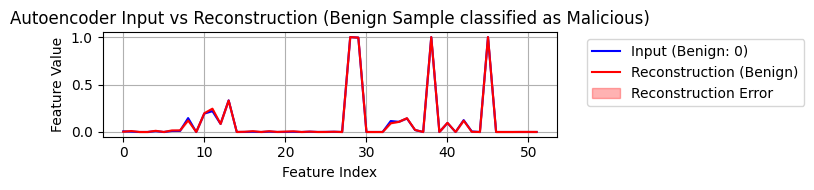

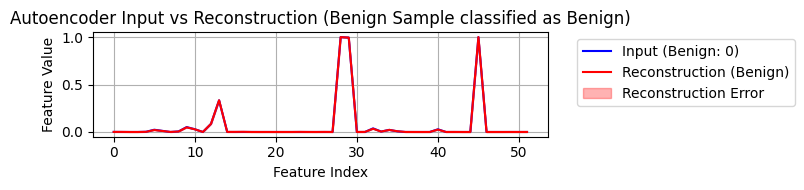

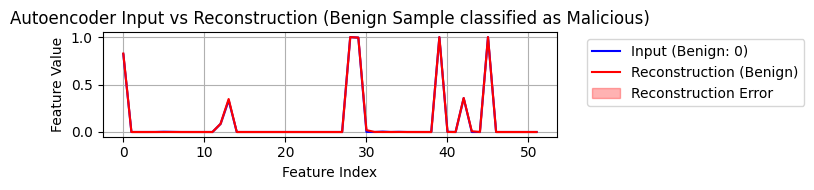

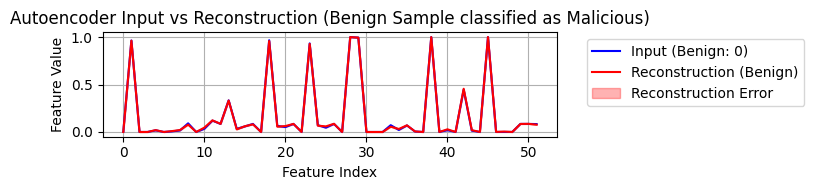

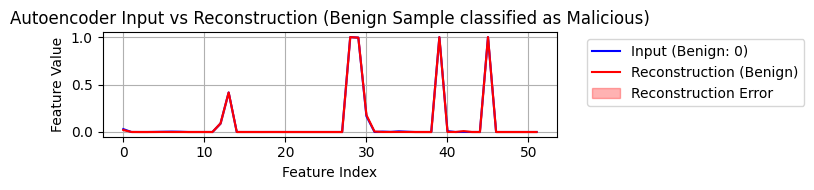

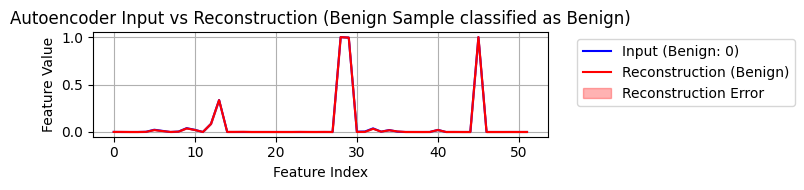

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Find the indexs of all the benign and a malicious sample in the test set
benign_sample_indices = np.where(y_test == 0)[0] #list of indices that link to a benign sample in the test set


# Ensure there are benign and malicious samples in the test set before proceeding
if len(benign_sample_indices) > 0:
    benign_sample_idx_in_test_set = benign_sample_indices[0] # Get the first benign sample indice from the test set
else:
    benign_sample_idx_in_test_set = None
    print("No benign samples found in the test set.")


# --- Plot Benign Sample ---
if benign_sample_idx_in_test_set is not None:

  i = 0
  for i in range(20):
      # Plots
      plt.figure(figsize=(8, 2))
      plt.plot(X_test[benign_sample_indices[i]], label=f'Input (Benign: {y_test[benign_sample_indices[i]]})', color='blue')
      plt.plot(test_reconstructions[benign_sample_indices[i]], label='Reconstruction (Benign)', color='red')

      # Fill in error gap
      plt.fill_between(np.arange(len(X_test[benign_sample_indices[i]])),
                      np.minimum(X_test[benign_sample_indices[i]], test_reconstructions[benign_sample_indices[i]]),
                      np.maximum(X_test[benign_sample_indices[i]], test_reconstructions[benign_sample_indices[i]]),
                      color='red', alpha=0.3, label='Reconstruction Error')

      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
      plt.title(f"Autoencoder Input vs Reconstruction (Benign Sample classified as {'Malicious' if AE_y_pred[benign_sample_indices[i]] != 0 else 'Benign'})")
      plt.xlabel("Feature Index")
      plt.ylabel("Feature Value")
      plt.grid(True)
      plt.tight_layout()
      plt.show()

Malicious sample reconstructions

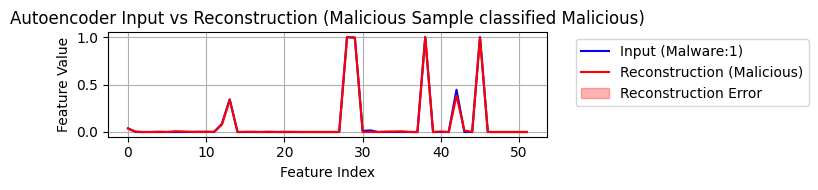

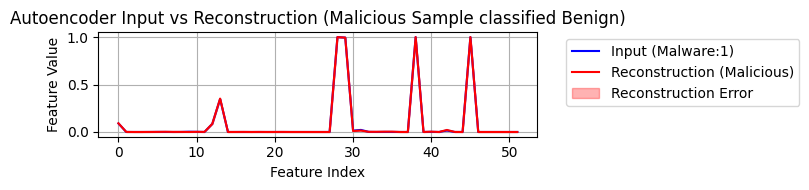

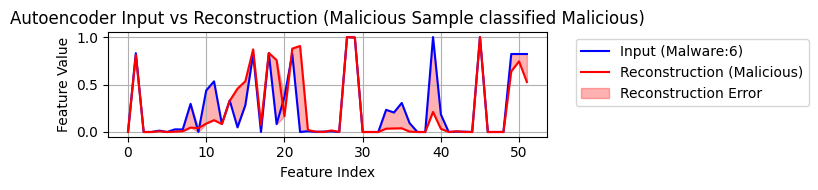

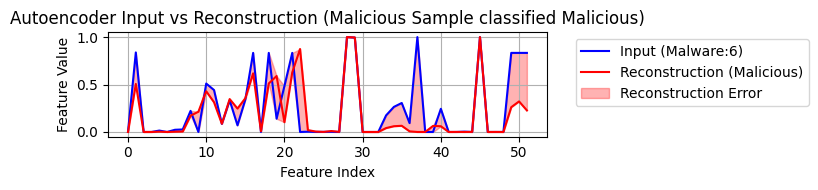

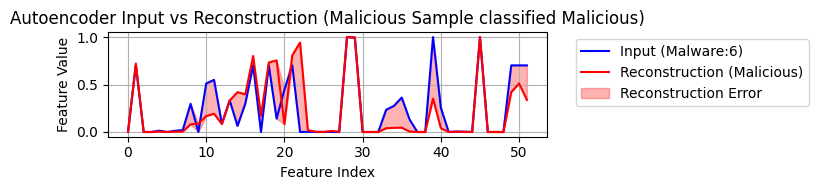

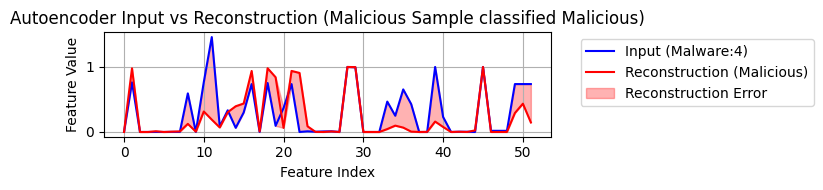

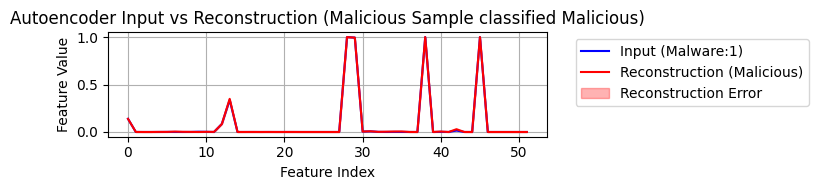

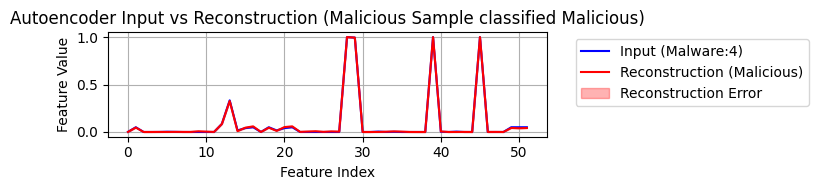

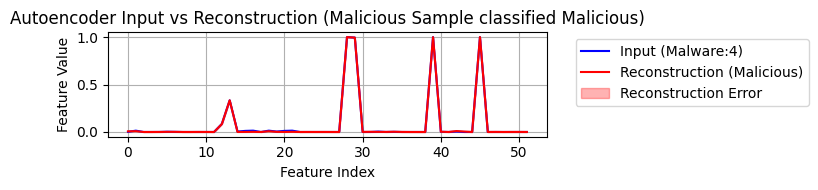

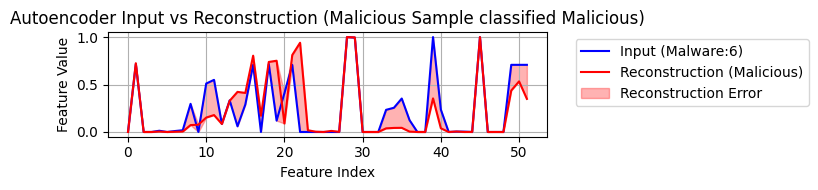

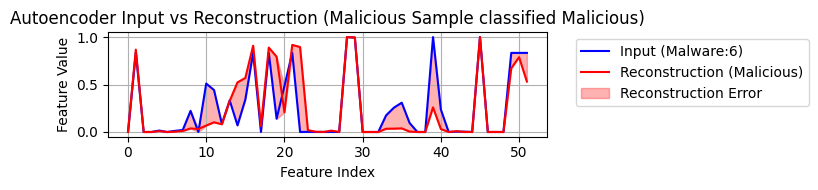

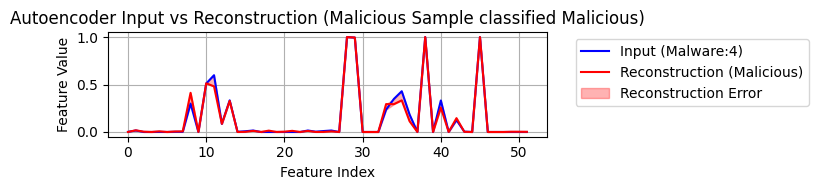

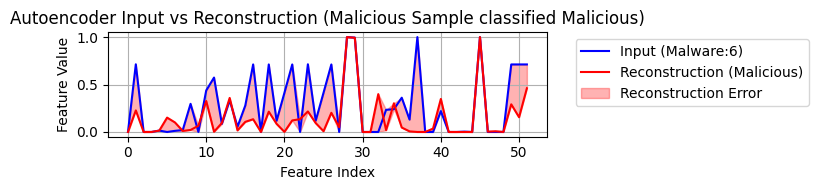

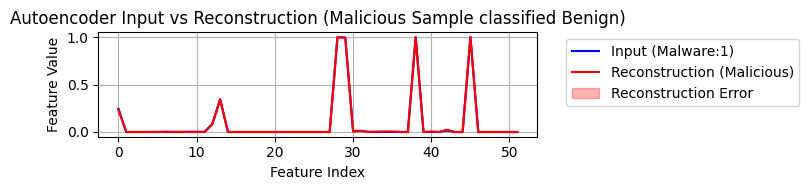

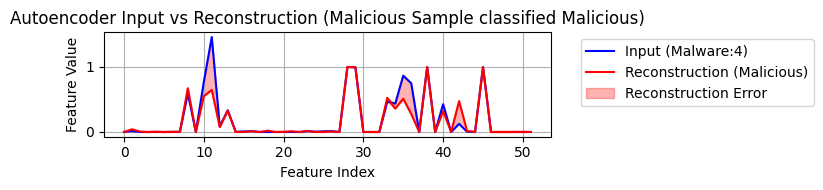

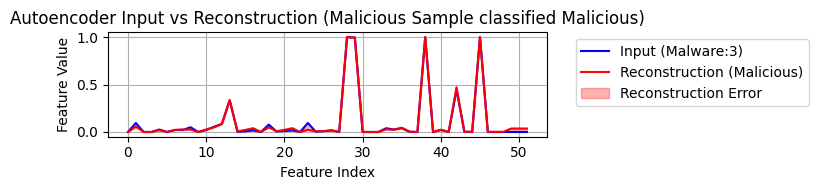

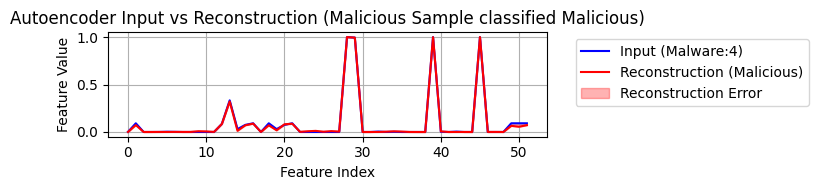

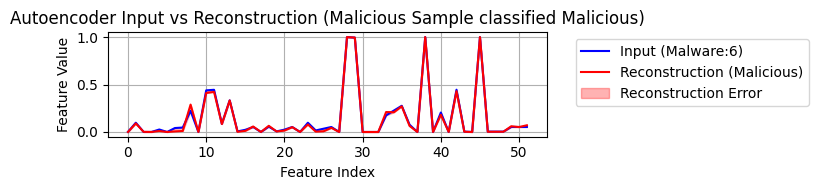

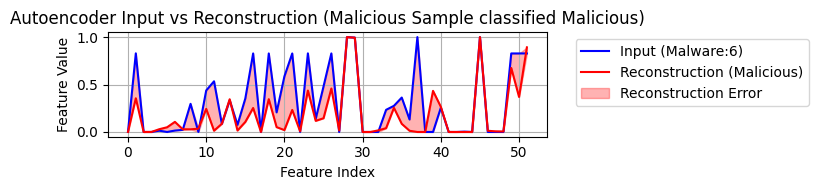

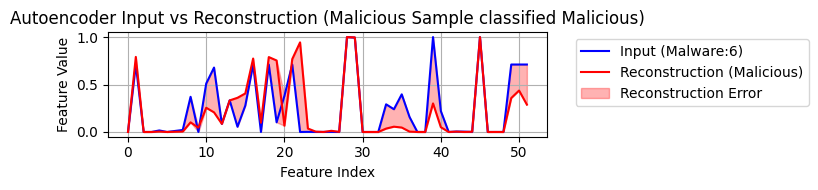

In [25]:
import matplotlib.pyplot as plt
import numpy as np
malicious_sample_indices = np.where(y_test != 0)[0]

if len(malicious_sample_indices) > 0:
    malicious_sample_idx_in_test_set = malicious_sample_indices[0] # Get the first malicious sample indice from the test set
else:
    malicious_sample_idx_in_test_set = None
    print("No malicious samples found in the test set.")

# --- Plot Malicious Sample ---
if malicious_sample_idx_in_test_set is not None:

  i = 0
  for i in range(20):
    #Plot
    plt.figure(figsize=(8, 2))
    plt.plot(X_test[malicious_sample_indices[i]], label=f'Input (Malware:{y_test[malicious_sample_indices[i]]})', color='blue')
    plt.plot(test_reconstructions[malicious_sample_indices[i]], label='Reconstruction (Malicious)', color='red')

    # Error band
    plt.fill_between(np.arange(len(X_test[malicious_sample_indices[i]])),
                      np.minimum(X_test[malicious_sample_indices[i]], test_reconstructions[malicious_sample_indices[i]]),
                      np.maximum(X_test[malicious_sample_indices[i]], test_reconstructions[malicious_sample_indices[i]]),
                      color='red', alpha=0.3, label='Reconstruction Error')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
    plt.title(f"Autoencoder Input vs Reconstruction (Malicious Sample classified {'Malicious' if AE_y_pred[malicious_sample_indices[i]] != 0 else 'Benign'})")
    plt.xlabel("Feature Index")
    plt.ylabel("Feature Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#Save Best AE

In [21]:

import os

# Save the trained model
model_path = os.path.join(save_path, 'Best_AE.keras')
autoencoder.save(model_path)  # Native Keras format
print(f"Model saved as {model_path}")



Model saved as /content/drive/MyDrive/Colab Notebooks/Honours Project/Sian's Models/AE-MLP Model/Best_AE.keras


#Save Thresholds

In [22]:
import numpy as np
import os

thresholds_path = os.path.join(save_path, 'ae_per_feature_thresholds.npy')

# Save the thresholds array
np.save(thresholds_path, per_feature_thresholds)

print(f"Per-feature thresholds saved to {thresholds_path}")

Per-feature thresholds saved to /content/drive/MyDrive/Colab Notebooks/Honours Project/Sian's Models/AE-MLP Model/ae_per_feature_thresholds.npy


# Save Best MLP

In [23]:
import os


# Save the trained model
model_path = os.path.join(save_path, 'Best_MLP.keras')
classifier.save(model_path)  # Native Keras format
print(f"Model saved as {model_path}")

Model saved as /content/drive/MyDrive/Colab Notebooks/Honours Project/Sian's Models/AE-MLP Model/Best_MLP.keras
